In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
combined_data = pd.read_csv("datasets/feature_engineered_aqi_data_local.csv")

In [79]:
combined_data.head()

,date,city,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,uv_index_clear_sky,uv_index,dust,aerosol_optical_depth,us_aqi,hour_sin,hour_cos,month_sin,month_cos,day_of_week,year
0,2023-06-01 06:00:00+00:00,dhaka,51.3,34.1,369.0,17.9,8.6,44.0,0.15,0.15,1.0,1.17,152.57675,1.000000,6.123234e-17,1.224647e-16,-1.0,3,2023
1,2023-06-01 07:00:00+00:00,dhaka,50.2,32.5,381.0,19.3,10.4,53.0,0.65,0.50,1.0,1.27,151.45615,0.965926,-2.588190e-01,1.224647e-16,-1.0,3,2023
2,2023-06-01 08:00:00+00:00,dhaka,51.3,32.9,397.0,21.1,12.9,67.0,1.75,1.55,1.0,1.26,150.46272,0.866025,-5.000000e-01,1.224647e-16,-1.0,3,2023
3,2023-06-01 09:00:00+00:00,dhaka,58.4,37.8,410.0,21.4,15.5,92.0,3.25,3.20,1.0,1.27,148.54167,0.707107,-7.071068e-01,1.224647e-16,-1.0,3,2023
4,2023-06-01 10:00:00+00:00,dhaka,71.5,46.9,405.0,18.0,16.0,121.0,4.80,4.65,1.0,1.34,146.14584,0.500000,-8.660254e-01,1.224647e-16,-1.0,3,2023


In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()
combined_data['city_encoded'] = le.fit_transform(combined_data['city'])

In [82]:
X = combined_data[[col for col in combined_data.columns if col not in ["date", "us_aqi", "city"]]]
y = combined_data["us_aqi"]

In [83]:
X.shape, y.shape

((54792, 17), (54792,))

In [84]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=43)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=43)

In [85]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [86]:
f'Coefficient of determination R^2 on train set {lin_reg.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 0.8389673402797295'

In [87]:
f'Coefficient of determination R^2 on test set {lin_reg.score(X_val, y_val)}'

'Coefficient of determination R^2 on test set 0.8406909719708882'

In [88]:
lin_reg.coef_

array([ 2.45562474e-01,  3.72807606e-01,  1.28924579e-02,  3.01385607e-01,
        2.55714106e-01,  3.60054974e-01, -1.36145333e+00, -6.82757856e-01,
       -1.58329403e-02,  1.17322058e+01,  6.70972311e+00, -2.33523718e-01,
        9.59504954e+00,  1.43166957e+01, -5.96692812e-02,  1.95432030e+00,
        3.49363808e+00])

In [89]:
lin_reg.intercept_

np.float64(-3927.712512553647)

In [90]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X, y, cv = 3)

In [91]:
score.mean()

np.float64(0.7055526831672472)

In [92]:
pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coeff'])

,Coeff
pm10,0.245562
pm2_5,0.372808
carbon_monoxide,0.012892
nitrogen_dioxide,0.301386
sulphur_dioxide,0.255714
ozone,0.360055
uv_index_clear_sky,-1.361453
uv_index,-0.682758
dust,-0.015833
aerosol_optical_depth,11.732206


In [93]:
c = 0
for val in lin_reg.coef_:
    effect = 'increase' if val > 0 else 'decrease'
    print(f'Holding all other features fixed a 1 unit increase in {X.columns[c]} is associated with {effect} of val in AQI PM2.5')
    c = c+1

Holding all other features fixed a 1 unit increase in pm10 is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in pm2_5 is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in carbon_monoxide is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in nitrogen_dioxide is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in sulphur_dioxide is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in ozone is associated with increase of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in uv_index_clear_sky is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in uv_index is associated with decrease of val in AQI PM2.5
Holding all other features fixed a 1 unit increase in dust is associated with decrease of 

In [94]:
pred = lin_reg.predict(X_test)

C:\Users\stasn\AppData\Local\Temp\ipykernel_28660\2485339681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred)


<Axes: xlabel='us_aqi', ylabel='Density'>

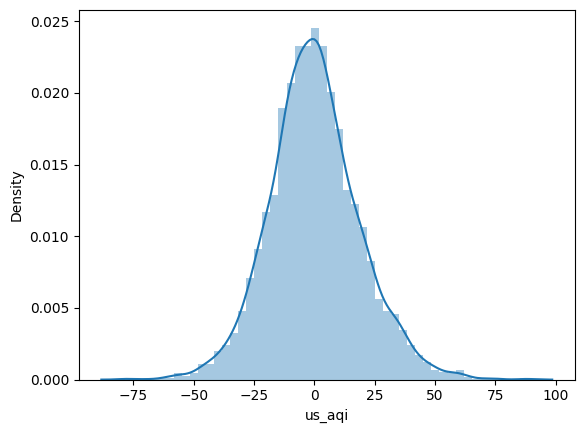

In [95]:
sns.distplot(y_test - pred)

In [96]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 14.381110872373775
Mean Sq Error: 348.9985003444115
Root Mean Error: 18.68150155486468


In [97]:
import pickle
pickle.dump(lin_reg, open('models/linreg.pkl', 'wb'))